# Pedersen N07 neutral case with heat flux

Comparison between Nalu-wind and Pedersen (2014)  

**Note**: To convert this notebook to PDF, use the command
```bash
$ jupyter nbconvert --TagRemovePreprocessor.remove_input_tags='{"hide_input"}' --to pdf postpro_n07.ipynb
```

In [1]:
%%capture
# Important header information
naluhelperdir = '../../utilities/'
# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, naluhelperdir)
import plotABLstats
import yaml as yaml
from IPython.display import Image
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
%matplotlib inline


In [2]:
# Nalu-wind parameters
rundir    = '/ascldap/users/lcheung/GPFS1/2020/amrcodes/testruns/neutral_n07'
statsfile = 'abl_statistics.nc'
avgtimes  = [82800,86400]

In [3]:
# Load nalu-wind data
data             = plotABLstats.ABLStatsFileClass(stats_file=rundir+'/'+statsfile);
Vprof, vheader    = plotABLstats.plotvelocityprofile(data, None, tlims=avgtimes, exportdata=True)
Tprof, theader    = plotABLstats.plottemperatureprofile(data, None, tlims=avgtimes, exportdata=True)

The netcdf file contains the variables:
(u'time', (8801,))
(u'heights', (193,))
(u'density', (8801, 193))
(u'velocity', (8801, 193, 3))
(u'velocity_tavg', (8801, 193, 3))
(u'sfs_stress', (8801, 193, 6))
(u'resolved_stress', (8801, 193, 6))
(u'sfs_stress_tavg', (8801, 193, 6))
(u'resolved_stress_tavg', (8801, 193, 6))
(u'temperature', (8801, 193))
(u'temperature_tavg', (8801, 193))
(u'temperature_sfs_flux_tavg', (8801, 193, 3))
(u'temperature_resolved_flux', (8801, 193, 3))
(u'temperature_variance', (8801, 193))
(u'temperature_resolved_flux_tavg', (8801, 193, 3))
(u'temperature_variance_tavg', (8801, 193))
(u'utau', (8801,))


In [4]:
# Pedersen parameters
datadir   = '../pedersen2014_data' 
ped_umag  = np.loadtxt(datadir+'/Pedersen2014_N07_velocity.csv', delimiter=',')
ped_T     = np.loadtxt(datadir+'/Pedersen2014_N07_temperature.csv', delimiter=',')
h         = 757

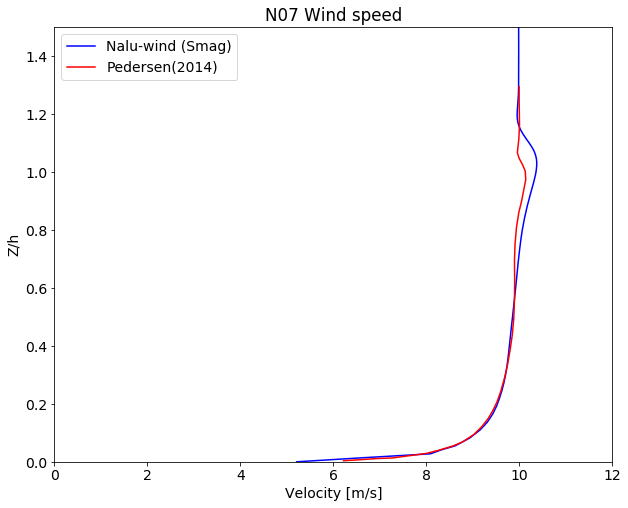

In [5]:
# Plot the velocity profile comparisons
plt.figure(figsize=(10,8));
plt.rc('font', size=14)

plt.plot(Vprof[:,4], Vprof[:,0]/h,     'b', label='Nalu-wind (Smag)')
plt.plot(ped_umag[:,0], ped_umag[:,1], 'r', label='Pedersen(2014)')

# Construct a legend
plt.legend()
plt.ylim([0, 1.5]);
plt.xlim([0, 12])
plt.xlabel('Velocity [m/s]')
plt.ylabel('Z/h')
#plt.grid()
plt.title('N07 Wind speed')

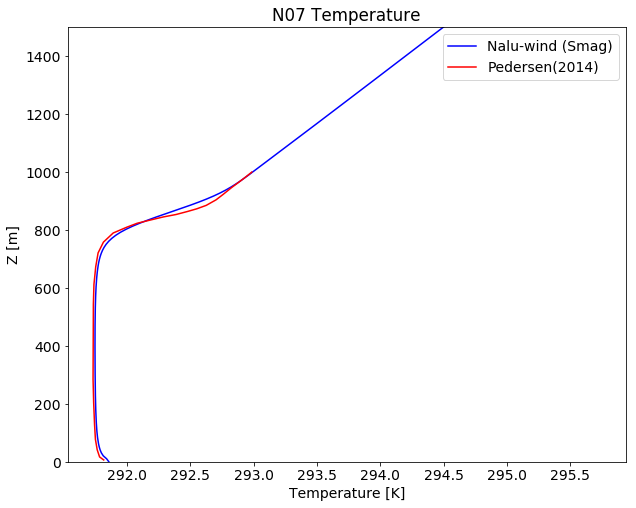

In [6]:
# Plot the temperature profile comparisons
plt.figure(figsize=(10,8));
plt.rc('font', size=14)

plt.plot(Tprof[:,1], Tprof[:,0], 'b', label='Nalu-wind (Smag)')
plt.plot(ped_T[:,0], ped_T[:,1], 'r', label='Pedersen(2014)')

# Construct a legend
plt.legend()
plt.ylim([0, 1500]);
#plt.xlim([0, 12])
plt.xlabel('Temperature [K]')
plt.ylabel('Z [m]')
#plt.grid()
plt.title('N07 Temperature')

In [7]:
# Extract TKE and Reynolds stresses
REstresses, REheader    = plotABLstats.plottkeprofile(data, None, tlims=avgtimes, exportdata=True)

In [8]:
# Extract the fluxes
tfluxes, tfluxheader    = plotABLstats.plottfluxprofile(data, None, tlims=avgtimes, exportdata=True)

In [9]:
# Extract the fluxes
sfstfluxes, sfstfluxheader= plotABLstats.plottfluxsfsprofile(data, None, tlims=[avgtimes[-1]-1, avgtimes[-1]], exportdata=True)

In [10]:
# Extract Utau
avgutau = plotABLstats.avgutau(data, None, tlims=avgtimes)
print('Avg Utau = %f'%avgutau)

Avg Utau = 0.384292


In [11]:
# Calculate the inversion height
zi, utauz = plotABLstats.calcInversionHeight(data, [1400.0], tlims=avgtimes)
print('zi = %f'%zi)

zi = 1708.163133


In [12]:
# Export the Nalu-Wind data for other people to compare
np.savetxt('NaluWind_N07_velocity.dat',             Vprof,         header=vheader)
np.savetxt('NaluWind_N07_temperature.dat',          Tprof,         header=theader)
np.savetxt('NaluWind_N07_reynoldsstresses.dat',     REstresses,    header=REheader)
np.savetxt('NaluWind_N07_temperaturefluxes.dat',    tfluxes,       header=tfluxheader)
np.savetxt('NaluWind_N07_sfstemperaturefluxes.dat', sfstfluxes,    header=sfstfluxheader)


In [13]:
# Write the YAML file with integrated quantities
import yaml
savedict={'zi':float(zi), 'ustar':float(avgutau)}
f=open('istats.yaml','w')
f.write('# Averaged quantities from %f to %f\n'%(avgtimes[0], avgtimes[1]))
f.write(yaml.dump(savedict, default_flow_style=False))
f.close()

In [14]:
# Extract Utau
utau, utheader    = plotABLstats.plotutauhistory(data, None, tlims=avgtimes, exportdata=True)
print('Avg Utau = %f'%np.mean(utau[:,1]))

Avg Utau = 0.383651
